In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
from sklearn import cross_validation as cv

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
import numpy as np

# This Function is Used to update the value of slope and intercept
def step_gradient(points, learning_rate, b_current, m_current):
    m_slope = 0
    b_slope = 0
    N = len(points)
    for i in range(N):
        x = points[i,0]
        y = points[i,1]
        b_slope += -(2/N) * (y- m_current*x -b_current)
        m_slope += -(2/N) * (y- m_current*x -b_current)*x
    new_m = m_current - learning_rate*m_slope
    new_b = b_current - learning_rate*b_slope
    return(new_b,new_m)

# Used to calculate the cost 
def cost_gd(b,m,points):
    total_cost = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i, 1]        
        total_cost += (y-(m*x+b))**2
    return total_cost/len(points)

# Runs the step_gradient function for updating the value of coefficients
def gd_runner(points,learning_rate, num_iterations, flag, printicost):
    b = 0 
    m = 0
    if(printicost==True): 
        print ("Starting Cost: ", cost_gd(b, m, points))
    for i in range(num_iterations):
        if(printicost==True):  
            if(i%100==0):
                print (i, " ", cost_gd(b,m,points))
        b, m = step_gradient(points,learning_rate,b,m)  
    if(printicost==True): 
        print ("Final Cost: ", cost_gd(b, m, points))
    return (b,m)

def run():
    points = np.loadtxt(open("data.csv", "rb"), delimiter = ",")
    learning_rate = 0.0001
    num_iterations = 1000
    final_b, final_m = gd_runner(points,learning_rate, num_iterations, False, True)

# Plots the Graph between Cost and Iterations    
def CostVSiterations():
    points = np.loadtxt(open("data.csv", "rb"), delimiter = ",")
    learning_rate = 0.0001
    num_iterations = []
    cost = []
    b = 0 
    m = 0
    print("Graph of Cost vs Iterations for 50 Iterations")
    for iterations in range(50):
        num_iterations.append(iterations)
        b, m = step_gradient(points,learning_rate,b,m)
        cost.append(cost_gd(b,m,points))
    plt.plot(num_iterations,cost)
    plt.show()
    
# Shows how the line moves to fit     
def PlotPointsLine():
    points = np.loadtxt(open("data.csv", "rb"), delimiter = ",")
    learning_rate = 0.0001
    num_iterations = 1000
    xtrue = []
    ytrue = []
    ypred = []
    final_b, final_m = gd_runner(points,learning_rate, num_iterations, False, False)
    for iterations in range(10):
        xtrue = []
        ytrue = []
        ypred = []
        for i in range(len(points)):
            final_b, final_m = gd_runner(points,learning_rate, iterations, False, False)
            xtrue.append(points[i][0])
            ytrue.append(points[i][1])
            ypred.append(final_m*points[i][0] + final_b)
        plt.plot(xtrue,ypred, label = str(i))
        plt.scatter(xtrue,ytrue)
    plt.show()

In [34]:
run()

Starting Cost:  5565.10783448
0   5565.10783448
100   112.647056643
200   112.643452023
300   112.63985284
400   112.636259086
500   112.632670753
600   112.629087833
700   112.625510317
800   112.621938198
900   112.618371467
Final Cost:  112.614810116


Graph of Cost vs Iterations for 50 Iterations


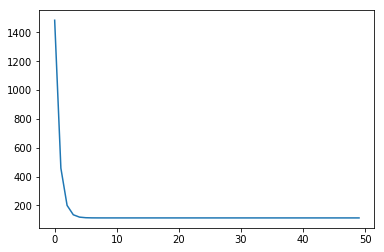

In [35]:
CostVSiterations()

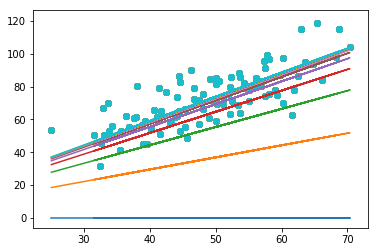

In [36]:
PlotPointsLine()